<a href="https://colab.research.google.com/github/nanma04/Mini_Project-Frontend-/blob/main/Copy_of_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from tkinter import Tk, filedialog


In [ ]:
def upload_file():
    root = Tk()
    root.withdraw()  # Hide the main window
    file_path = filedialog.askopenfilename(title="Select a CSV file", filetypes=[("CSV files", "*.csv")])
    return file_path

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_diet_recommendation_dataset.csv to test_diet_recommendation_dataset.csv
Saving diet_recommendation_dataset.csv to diet_recommendation_dataset.csv


In [ ]:
import os
os.listdir()

['.config',
 'diet_recommendation_dataset.csv',
 'test_diet_recommendation_dataset.csv',
 'sample_data']

In [ ]:
# Upload training dataset
train_file_path = 'diet_recommendation_dataset.csv'  # Use the filename directly
train_df = pd.read_csv(train_file_path)  # Load the training data

# Upload test dataset
test_file_path = 'test_diet_recommendation_dataset.csv'  # Use the filename directly
test_df = pd.read_csv(test_file_path)  # Load the test data


In [ ]:
# Encode categorical features
label_encoders = {}
for col in ["BMI Category", "Dietary Preference", "Health Goal", "Activity Level"]:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])  # Use same encoding for test data
    label_encoders[col] = le


In [ ]:
# Encode target variable
le_food = LabelEncoder()
train_df["Recommended Foods"] = le_food.fit_transform(train_df["Recommended Foods"])
test_df["Recommended Foods"] = le_food.transform(test_df["Recommended Foods"])


In [ ]:
# Split features and target
X_train = train_df.drop(columns=["Recommended Foods"])
y_train = train_df["Recommended Foods"]
X_test = test_df.drop(columns=["Recommended Foods"])
y_test = test_df["Recommended Foods"]


In [ ]:
# Train Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
# Make predictions on the test set
y_pred = clf.predict(X_test)


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
report = classification_report(y_test, y_pred, target_names=le_food.classes_)
print("Classification Report:")
print(report)


Accuracy: 100.00%
Classification Report:
                                         precision    recall  f1-score   support

   Balanced Diet, Whole Grains, Legumes       1.00      1.00      1.00         7
             Eggs, Chicken, Fish, Dairy       1.00      1.00      1.00        10
   High-Fiber Foods, Fruits, Vegetables       1.00      1.00      1.00        10
Leafy Greens, Fiber-Rich Foods, Lentils       1.00      1.00      1.00        14
   Lean Meat, Dairy, Fruits, Vegetables       1.00      1.00      1.00         7
      Lean Protein, Low-Carb Diet, Fish       1.00      1.00      1.00        21
         Low-Fat Dairy, Lean Meat, Fish       1.00      1.00      1.00        12
           Nuts, Avocados, Tofu, Quinoa       1.00      1.00      1.00        19

                               accuracy                           1.00       100
                              macro avg       1.00      1.00      1.00       100
                           weighted avg       1.00      1.00      

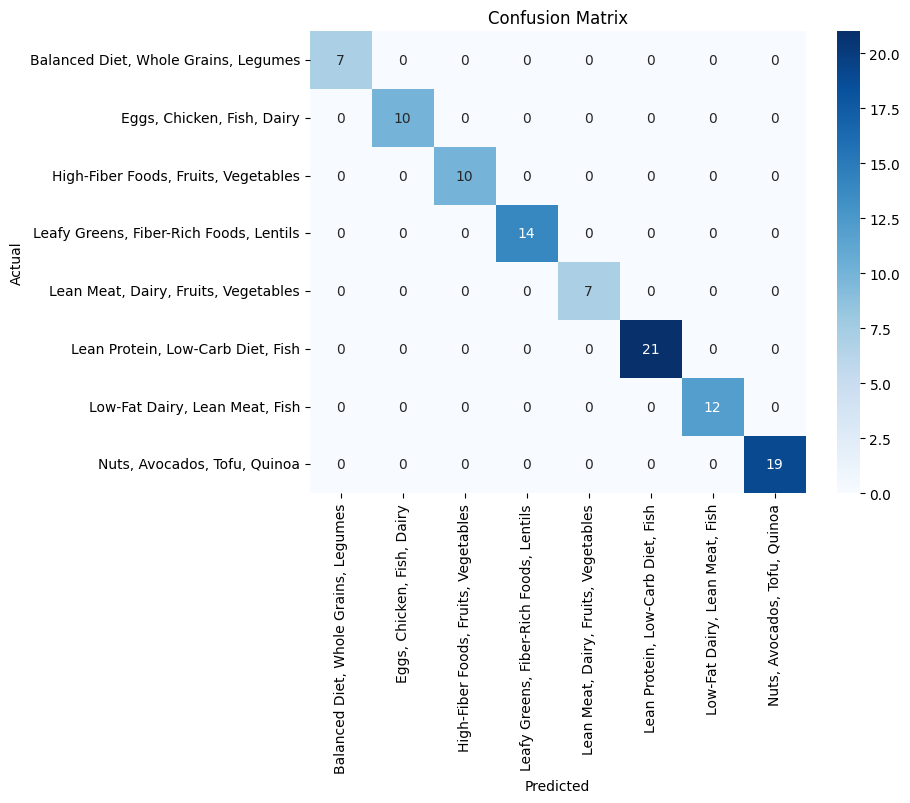

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
predictions = clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le_food.classes_, yticklabels=le_food.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



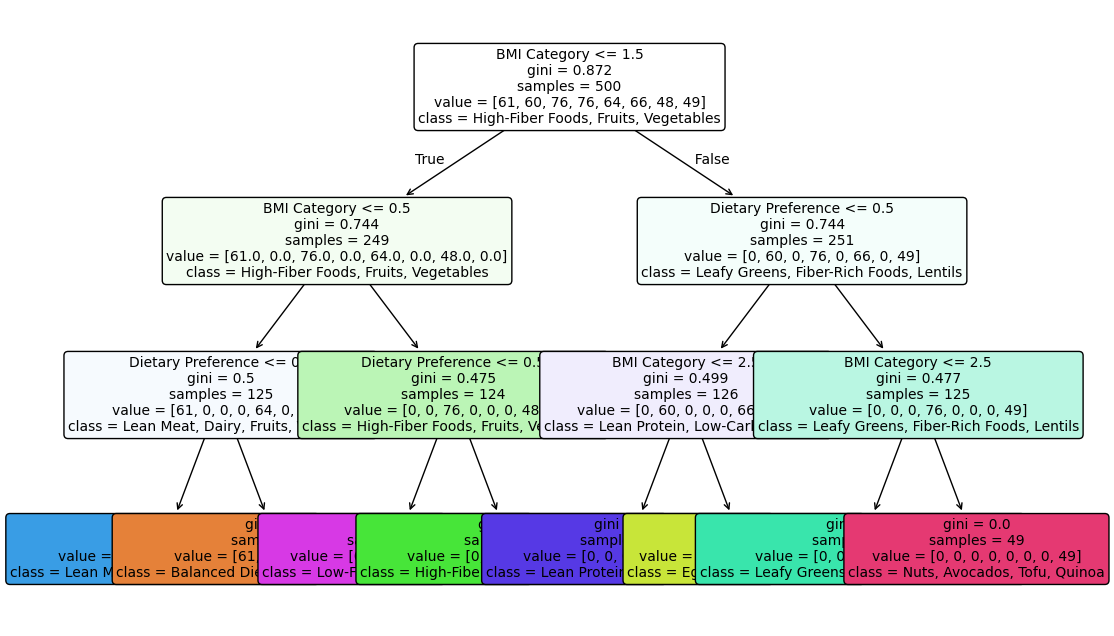

In [ ]:
from sklearn.tree import plot_tree

# Plot the trained decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=le_food.classes_, rounded=True, fontsize=10)
plt.show()


In [ ]:
# Let's say you're trying to predict for someone with specific features
custom_data = {
    'BMI Category': ['Normal'],
    'Dietary Preference': ['Vegan'],
    'Health Goal': ['Sugar Management'],
    'Activity Level': ['Very Active'],
}

# Convert it to a DataFrame (ensure it matches the structure of your training data)
custom_df = pd.DataFrame(custom_data)

# Encode the custom data the same way as the training data
for col in custom_df.columns:
    custom_df[col] = label_encoders[col].transform(custom_df[col])

# Make a prediction
custom_prediction = clf.predict(custom_df)

# Decode the predicted label back to its original class
predicted_food = le_food.classes_[custom_prediction[0]]
print(f"Predicted Recommended Food: {predicted_food}")


Predicted Recommended Food: Balanced Diet, Whole Grains, Legumes
